# Lending Club Case Study (EDA)

## I. Import DataSet
For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [130]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [131]:
df = pd.read_csv('loan.csv')
df.head()

/Users/bharatverma/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [132]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

<ipython-input-132-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as tot_hi_cred_lim and tot_hi_cred_lim), in fact some of them has all values as NaN/null. Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remov member_id and the features with 30% or more null values.

## II. Data Cleaning

In [133]:
df2 = df[df.columns[df.isnull().mean() <= 0.3]]
del df2['member_id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: member_id, desc, mths_since_last_delinq, mths_since_last_record, next_pymnt_d, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limi

There are some behavior variables as well which are not available at the time of loan application, and thus they can not be used as predictors of credit approval. These are the behavioral variables that we identified and hence we are dropping them.
'delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d'

In [134]:
drop_cols = [
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d'
]

df.drop(drop_cols, axis = 1, inplace=True)

In [135]:
df.shape

(39717, 32)

Now let's remove those loans which are currently running, because we don't know whether they will result in 'default' or 'Fully Paid', so let's drop all records where loan_status = 'Current'

In [136]:
df = df[df.loan_status != 'Current']
df.shape

(38577, 32)

Let's convert int_rate from object to numeric, and add that as a new variable 'int_rate_num'

In [137]:
df['int_rate_num'] = df['int_rate'].apply(lambda x: float(x[:-1]))

In [138]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_num
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.65
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.27
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.96
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13.49
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,7.90


In [139]:
df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

Also standardize emp_length, dropping the suffix 'year' or 'years' and increasing any number appended with '+' by 0.5, for example, 10+ years will get converted to 10.5 and casting it to float for further calculations. 
There are some nan values in the column which can be a problem while converting them to float, one option could be is that, we impute those values with mean or median. But for now, I am not imputing them, I will be filling them with a placeholder (0 in this case), why 0, because when I checked value_counts() on the column emp_length, none of them was 0, therefore I can use 0 as the placeholder for nan/null in this particular case, it will act as a marker for us

In [140]:
def toNum(x):
    tokens = x.split(' ')

    if tokens[0] == '<':
        return float(tokens[1])
    elif tokens[0] == '10+':
        return 10.5
    else:
        return float(tokens[0])

df['emp_length_num'] = df['emp_length'].fillna('0').apply(toNum)

Converting 'issue_d' from object to date datatype and putting it under a new name 'issue_date'

In [141]:
df['issue_date'] = df.issue_d.apply(lambda x: dt.strptime(x, '%b-%y'))

Encoding our target variable 'loan_status' to numerical values

Replacing 'Fully Paid' with 0 and 'Charged Off' with 1

In [142]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [143]:
df['loan_status_int'] = df.loan_status.apply(lambda x: 0 if x == 'Fully Paid' else 1)

#### Outlier treatment

Annual_inc seems to have some of the values way higher than usual, thus, to not bias the analysis, we should remove those outliers. We will change the values of those outliers and set them to the boundaries of fences instead. (Q3 + 1.5 * IQR)

<AxesSubplot:>

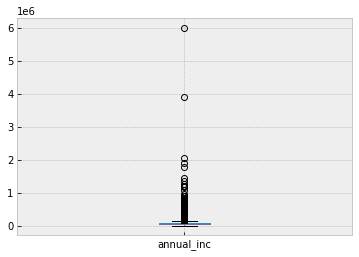

In [144]:
df['annual_inc'].plot.box()

In [145]:
df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [146]:
upper_quartile = np.percentile(df['annual_inc'], 75)
lower_quartile = np.percentile(df['annual_inc'], 25)
iqr = upper_quartile - lower_quartile
upper_whisker = upper_quartile + 1.5*iqr

df['annual_inc'] = df['annual_inc'].apply(lambda x: upper_whisker if x > upper_whisker else x)


<AxesSubplot:>

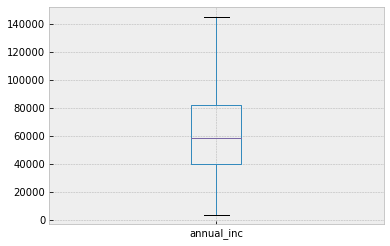

In [147]:
df['annual_inc'].plot.box()

## III. Univariate Analysis

### A. Numerical columns univariate analysis
For this part lets look at the distribution of all of the features by ploting them.

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [148]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64'), dtype('<M8[ns]')]

In [149]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_num,emp_length_num,loan_status_int
0,1077501,5000,5000,4975.0,162.87,24000.0,27.65,0.0,1,0,0.0,0,0.0,0.0,10.65,10.5,0
1,1077430,2500,2500,2500.0,59.83,30000.0,1.00,0.0,1,0,0.0,0,0.0,0.0,15.27,1.0,1
2,1077175,2400,2400,2400.0,84.33,12252.0,8.72,0.0,1,0,0.0,0,0.0,0.0,15.96,10.5,0
3,1076863,10000,10000,10000.0,339.31,49200.0,20.00,0.0,1,0,0.0,0,0.0,0.0,13.49,10.5,0
5,1075269,5000,5000,5000.0,156.46,36000.0,11.20,0.0,1,0,0.0,0,0.0,0.0,7.90,3.0,0


Now lets plot them all:

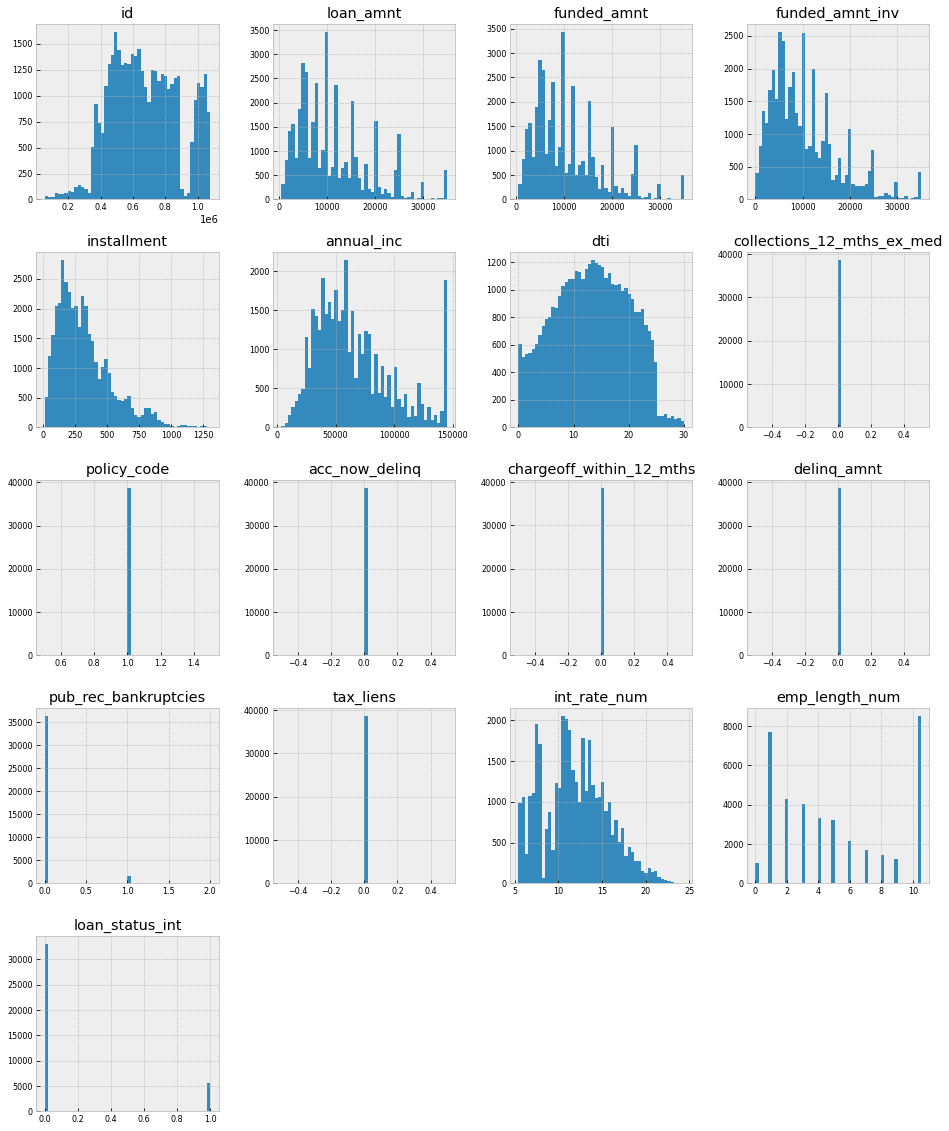

In [150]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Seeing the above plots, one can say that, some of the columns are not changing at all, means they are constant, then it's obvious that we can not use those variables in our predictions.
All such columns are: 
    
1. collections_12_mths_ex_med
2. policy_code
3. acc_now_delinq
4. chargeoff_within_12_mths
5. delinq_amt
6. tax_liens
7. pub_rec_bankruptcies (<i>Not sure how this can be used,it is single valued most of the time</i>)

<p style="color:orange;">
And on the other hand 'loan_amnt', 'funded_amnt' and 'funded_amnt_inv' all are pointing to almost the same data, so we can use just one of them, say 'loan_amnt'
</p>

In [151]:
# we will do further univariate analysis on below numerical columns
df_num_useful = df_num[
    ['loan_amnt', 'installment', 'annual_inc', 'dti', 'int_rate_num', 'emp_length_num', 'loan_status_int']]

#### 1. Loan Amount analysis

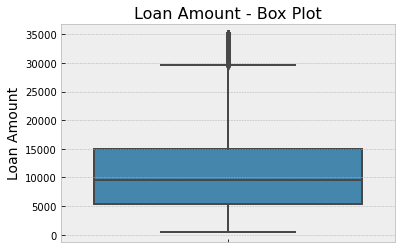

In [152]:
ax = sns.boxplot(y=df['loan_amnt'])
ax.set_title('Loan Amount - Box Plot', fontsize=16)
ax.set_ylabel('Loan Amount', fontsize=14)
plt.show()

#It shows that most of the loan amounts are in the range of 5000-15000

#### 2. Annual Income analysis

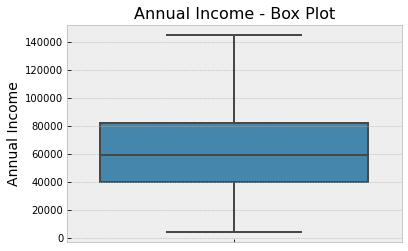

In [153]:
ax = sns.boxplot(y=df['annual_inc'])
ax.set_title('Annual Income - Box Plot', fontsize=16)
ax.set_ylabel('Annual Income', fontsize=14)
plt.show()

#For most of loan applicants annual income is in the range of 40000-80000

#### 3. DTI (Debt to income ratio) analysis

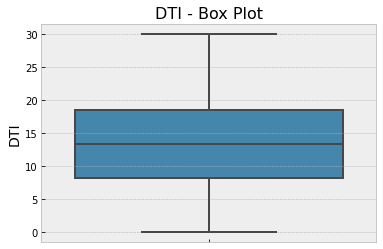

In [154]:
ax = sns.boxplot(y=df['dti'])
ax.set_title('DTI - Box Plot', fontsize=16)
ax.set_ylabel('DTI', fontsize=14)
plt.show()

# for most of the loan applicants DTI is in the range of ~8-18, Not sure what to infer from this info, 
# but let's see in bivariate analysis of dti

#### 4. Interest Rate analysis

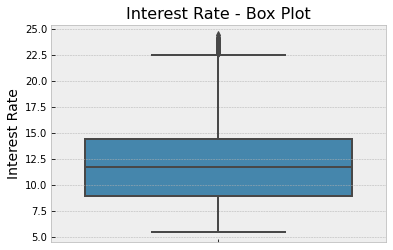

In [155]:
ax = sns.boxplot(y=df['int_rate_num'])
ax.set_title('Interest Rate - Box Plot', fontsize=16)
ax.set_ylabel('Interest Rate', fontsize=14)
plt.show()

# For most of the loans the interest rate is roughly in the range of 9-14%

#### 5. Employment Length analysis

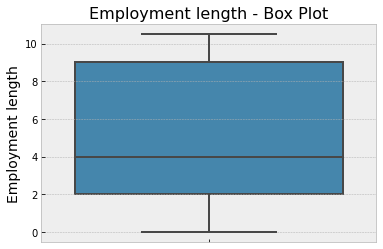

In [156]:
ax = sns.boxplot(y=df['emp_length_num'])
ax.set_title('Employment length - Box Plot', fontsize=16)
ax.set_ylabel('Employment length', fontsize=14)
plt.show()

# ~50% of the loan applicants are employed in the range of 2-9 years

### B. Categorical variables Univariate analysis

Let's first extract list of useful categorical columns (By Reading the given Data_Dictionary.xlsx)

In [157]:
categorical_features = ["term", "grade", "sub_grade", "home_ownership", "verification_status", "issue_date", "purpose", "addr_state", "loan_status"]
df_cat = df[categorical_features]
df_cat.head()

# Out of them, let's continue our analysis over term, grade, subgrade, home_ownership,
# verfication_ststus, issue_date, purpose, addr_state

# we are not going to analyze pymnt_plan, application_type and initial_list_status
# because these are single valued columns, thus will provide no help in prediction

# It's difficult to analyse Title, instead we will analyse 'purpose'
# Similarly we will analyse addr_state instead of zip_code

# 'url' won't help in prediction, so won't analyse that


,term,grade,sub_grade,home_ownership,verification_status,issue_date,purpose,addr_state,loan_status
0,36 months,B,B2,RENT,Verified,2011-12-01,credit_card,AZ,Fully Paid
1,60 months,C,C4,RENT,Source Verified,2011-12-01,car,GA,Charged Off
2,36 months,C,C5,RENT,Not Verified,2011-12-01,small_business,IL,Fully Paid
3,36 months,C,C1,RENT,Source Verified,2011-12-01,other,CA,Fully Paid
5,36 months,A,A4,RENT,Source Verified,2011-12-01,wedding,AZ,Fully Paid


In [158]:
df.pymnt_plan.value_counts()

n    38577
Name: pymnt_plan, dtype: int64

In [159]:
df.initial_list_status.value_counts()

f    38577
Name: initial_list_status, dtype: int64

In [160]:
df.application_type.value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

#### 1. Loan Repayment Term analysis

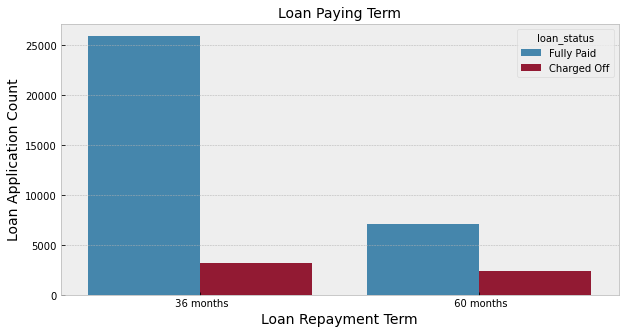

In [161]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="term", hue='loan_status', data=df_cat)
ax.set_title('Loan Paying Term', fontsize=14)
ax.set_xlabel('Loan Repayment Term', fontsize=14)
ax.set_ylabel('Loan Application Count', fontsize=14)      
plt.show()

# Below chart shows that applicants chosen 60 months as repayment term has more % of charged-off 
# as comapred to the applicants with 36 month repayment term

#### 2. Grade Analysis

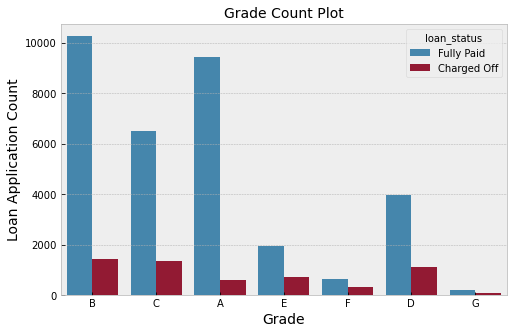

In [162]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="grade", hue='loan_status', data=df_cat)
ax.set_title('Grade Count Plot', fontsize=14)
ax.set_xlabel('Grade', fontsize=14)
ax.set_ylabel('Loan Application Count', fontsize=14)      
plt.show()

# Most of the loans were dispersed to A and B grade applicants, and the %age of defaults 
# are less for top grade applicants.

#### 3. Home Ownership Analysis

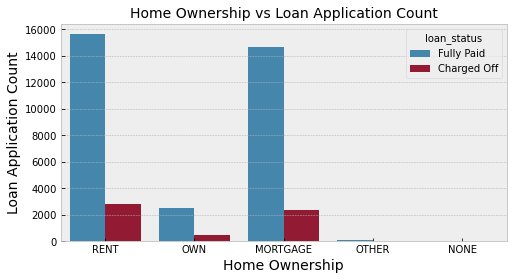

In [163]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="home_ownership", hue='loan_status', data=df_cat)
ax.set_title('Home Ownership vs Loan Application Count', fontsize=14)
ax.set_xlabel('Home Ownership', fontsize=14)
ax.set_ylabel('Loan Application Count', fontsize=14)      
plt.show()

# Most of the applicants applying for loan are either on RENT or are paying mortgage, and hence the charged-off is high

#### 4. Verification Status

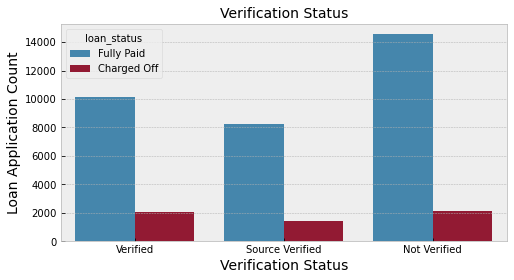

In [164]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="verification_status", hue='loan_status', data=df_cat)
ax.set_title('Verification Status', fontsize=14)
ax.set_xlabel('Verification Status', fontsize=14)
ax.set_ylabel('Loan Application Count', fontsize=14)      
plt.show()

# Not so helpful to decide which kind of applicants defaults more

#### 5. Purpose of loan

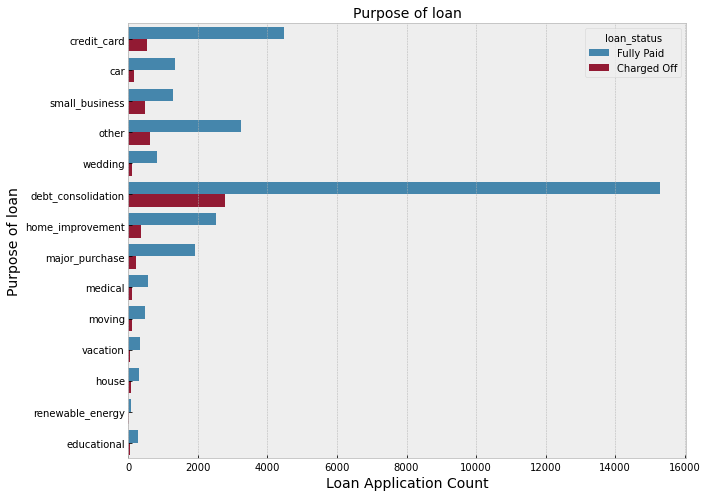

In [165]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y="purpose", hue='loan_status', data=df_cat)
ax.set_title('Purpose of loan', fontsize=14)
ax.set_ylabel('Purpose of loan', fontsize=14)
ax.set_xlabel('Loan Application Count', fontsize=14)      
plt.show()

# Most of the people are taking loan for debt consolidation, hence most number of charge-off are in that category

#### 6. Address State

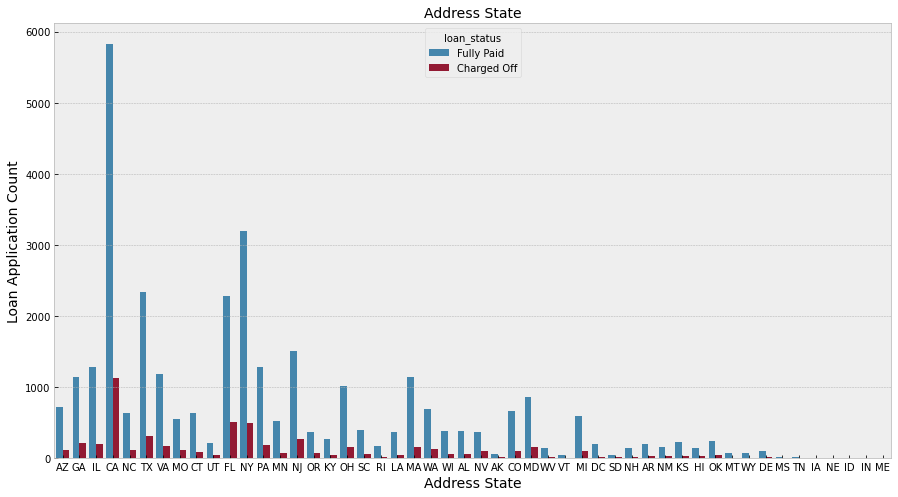

In [166]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x="addr_state", hue='loan_status', data=df_cat)
ax.set_title('Address State', fontsize=14)
ax.set_xlabel('Address State', fontsize=14)
ax.set_ylabel('Loan Application Count', fontsize=14)      
plt.show()

# Most Number of loan applications are coming from 'CA' state, hence most number of charge-offs

## IV. Bivariate Analysis

#### Correlation

Now we'll try to find the correlation of features with 'loan_status_int'. We'll reuse our df_num_useful dataset to do so.

In [167]:
df_num_corr = df_num_useful.corr()['loan_status_int'][:-1] # -1 because the latest row is loan_status_int
df_num_corr.sort_values(ascending=False, inplace=True)
print("Here is the correlation of {} features with loan_status:\n{}".format(len(df_num_corr), df_num_corr))


Here is the correlation of 6 features with loan_status:
int_rate_num      0.211390
loan_amnt         0.059463
dti               0.045078
installment       0.027153
emp_length_num    0.008151
annual_inc       -0.067295
Name: loan_status_int, dtype: float64


#### Conclusion

By looking at correlation between numerical values we discovered 6 features which have a strong relationship to loan_status (getting defaulted). These are:
1. int_rate_num
2. loan_amnt
3. dti
4. installment
5. emp_length_num (this has very least correlation though, but let's keep it for now)
6. annual_inc (negtive correlation)

There is a negative correlation between annual_inc and loan_status, which makes sense, the higher the annual income is, less are the chances of default

### Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

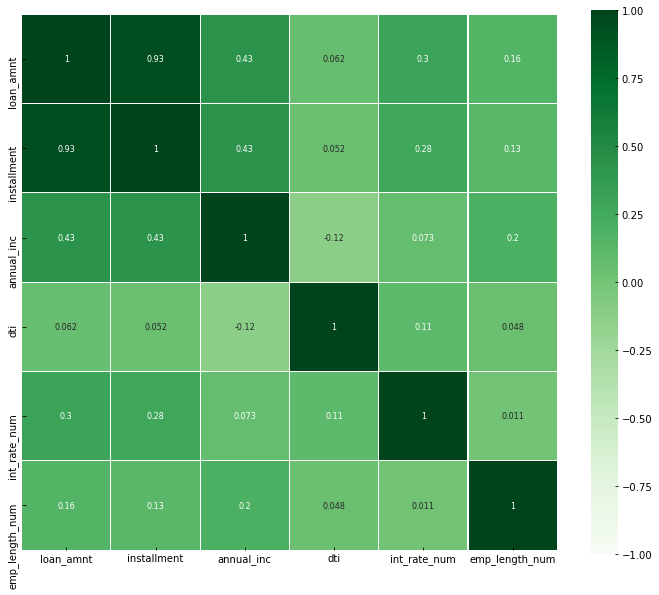

In [168]:
corr = df_num_useful.drop('loan_status_int', axis=1).corr() # We already examined loan_status_int correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr, cmap='Greens', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Some understandings from above heat map:

1. There is a strong correlation between loan_amnt and installment, which is obvious, the big the loan amount is, the higher will be the installment amount.

2. Annual income and loan_amnt are also somewhat correlated, which means people take loans in proportion to what they earn. (it's not the case that someone is earning less but taking large amount of loan)

3. dti (debt to income ratio) is positively correlated with loan_amnt and negatively correlated with annual_income

4. interest rate is also postively correlated with loan_amnt, that means interest rates are higher for high amount of loan

Let's plot boxplots of loan_status with the above numerical features

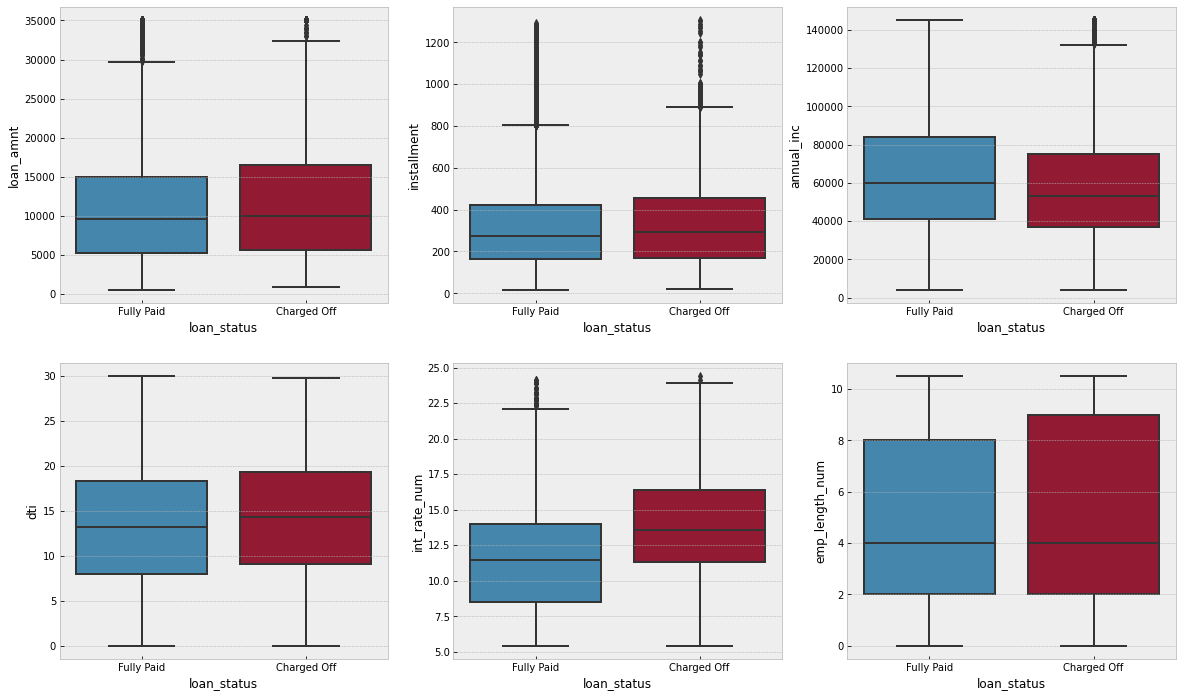

In [169]:
features_to_analyse = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'int_rate_num', 'emp_length_num']

fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (20, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse):
        sns.boxplot(y=features_to_analyse[i], x='loan_status', data=df, ax=ax, orient='v')

From the above plots, we can see that for interest_rate greater than 15%, chances of default cases increases

Now Let's plot some regplots of loan_status with the numerical variables

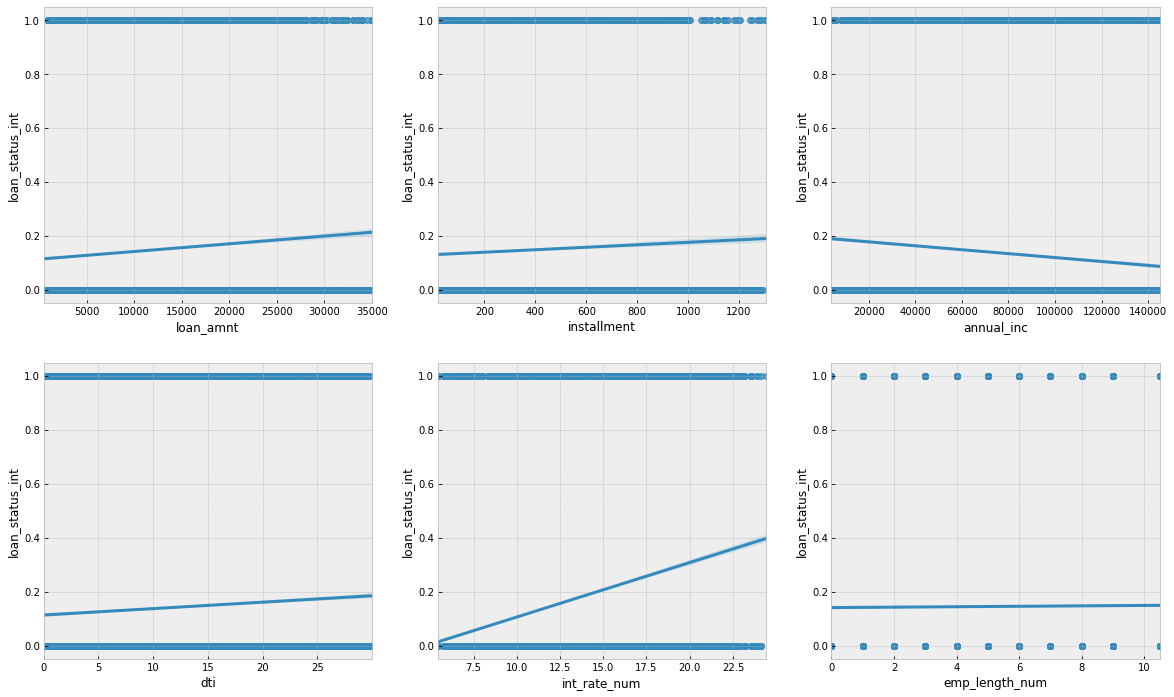

In [170]:
features_to_analyse = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'int_rate_num', 'emp_length_num']

fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (20, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse):
        sns.regplot(x=features_to_analyse[i], y='loan_status_int', data=df, ax=ax)

From the above plots, it's evident that emp_length is not a strong factor in deciding whether a loan end up being default or fully paid, hence we would not consider emp_length in our predictions.

Whereas loan_amnt (or installment), int_rate, dti and annual_inc seems to be the major factors in predicting the loan_status

### Doing bivariate analysis of features with relative chargeOff proportions

We have to find the relative charge-off for categorical variables. We can't simply say that the charge-off is high for a category because the count of charge-off is high, we should calculate the percentage of charge-off rather, and then compare the percentages to see the actual picture.

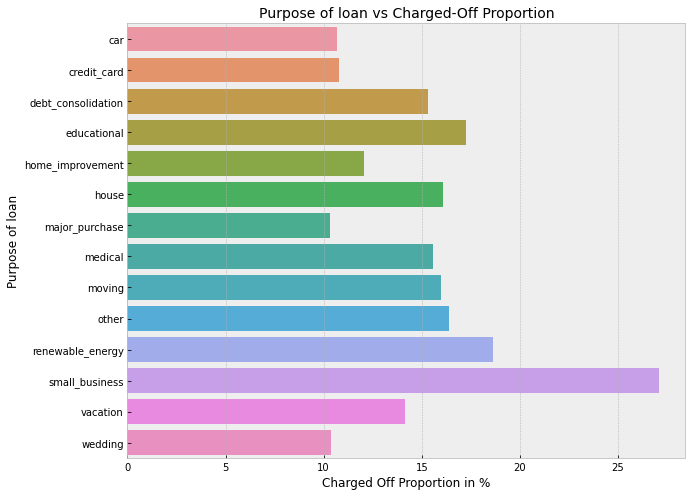

In [240]:
# Purpose of loan vs Charged-Off proportion

purpose_loan_pivot = df.pivot_table(index=['purpose'], values=['id'], columns=['loan_status'], aggfunc='count')
purpose_vs_loanstatus = pd.DataFrame({
    "purpose": purpose_loan_pivot.index.values,
    "Charged Off": purpose_loan_pivot[('id', 'Charged Off')].values,
    "Fully Paid": purpose_loan_pivot[('id', 'Fully Paid')].values
})

purpose_vs_loanstatus['Total'] = purpose_vs_loanstatus['Charged Off'] + purpose_vs_loanstatus['Fully Paid']
purpose_vs_loanstatus['ChargedOffProp'] = round(purpose_vs_loanstatus['Charged Off']/purpose_vs_loanstatus['Total'] * 100, 2)

plt.figure(figsize=(10, 8))
ax = sns.barplot(y='purpose', x='ChargedOffProp', data=purpose_vs_loanstatus)
ax.set_title('Purpose of loan vs Charged-Off Proportion', fontsize=14)
ax.set_xlabel('Charged Off Proportion in %')
ax.set_ylabel('Purpose of loan')
plt.show()

# We got to know from below graph is that, Charge-Off proportion for Small-Business is very high


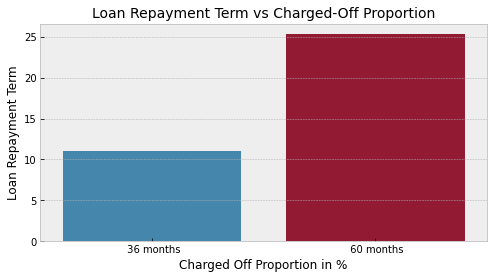

In [239]:
# Loan repayment term vs ChargedOff Proportion
term_loan_pivot = df.pivot_table(index=['term'], values=['id'], columns=['loan_status'], aggfunc='count')
term_vs_loanstatus = pd.DataFrame({
    "term": term_loan_pivot.index.values,
    "Charged Off": term_loan_pivot[('id', 'Charged Off')].values,
    "Fully Paid": term_loan_pivot[('id', 'Fully Paid')].values
})

term_vs_loanstatus['Total'] = term_vs_loanstatus['Charged Off'] + term_vs_loanstatus['Fully Paid']
term_vs_loanstatus['ChargedOffProp'] = round(term_vs_loanstatus['Charged Off']/term_vs_loanstatus['Total'] * 100, 2)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x='term', y='ChargedOffProp', data=term_vs_loanstatus)
ax.set_title('Loan Repayment Term vs Charged-Off Proportion', fontsize=14)
ax.set_xlabel('Charged Off Proportion in %')
ax.set_ylabel('Loan Repayment Term')
plt.show()

# It shows that Charge-off cases are more often in repayment term of 60 months as compared to repayment term of 36 months

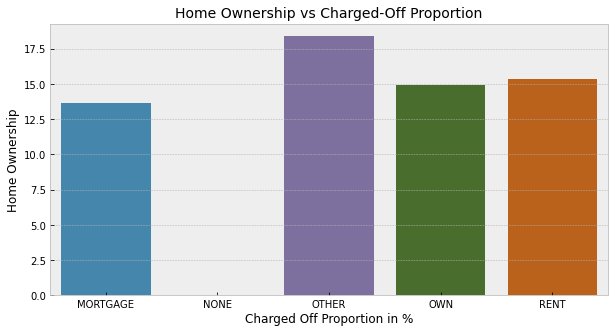

In [237]:
# Home ownership vs ChargedOff Proportion
home_loan_pivot = df.pivot_table(index=['home_ownership'], values=['id'], columns=['loan_status'], aggfunc='count')
home_vs_loanstatus = pd.DataFrame({
    "home_ownership": home_loan_pivot.index.values,
    "Charged Off": home_loan_pivot[('id', 'Charged Off')].values,
    "Fully Paid": home_loan_pivot[('id', 'Fully Paid')].values
})

home_vs_loanstatus['Total'] = home_vs_loanstatus['Charged Off'] + home_vs_loanstatus['Fully Paid']
home_vs_loanstatus['ChargedOffProp'] = round(home_vs_loanstatus['Charged Off']/home_vs_loanstatus['Total'] * 100, 2)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='home_ownership', y='ChargedOffProp', data=home_vs_loanstatus)
ax.set_title('Home Ownership vs Charged-Off Proportion', fontsize=14)
ax.set_xlabel('Charged Off Proportion in %')
ax.set_ylabel('Home Ownership')
plt.show()

# This doesn't give us any useful information

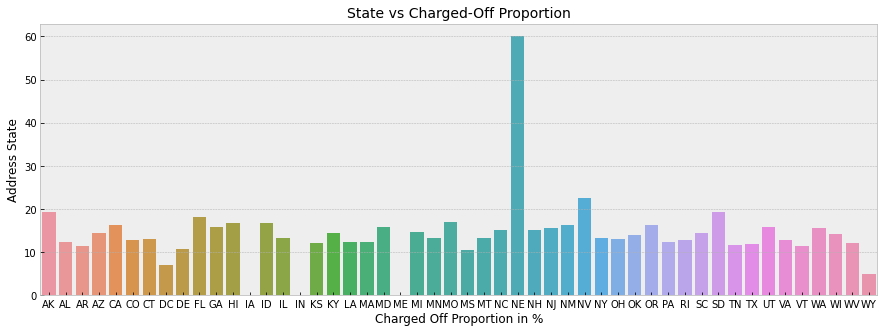

In [236]:
# Address State vs ChargedOff Proportion
state_loan_pivot = df.pivot_table(index=['addr_state'], values=['id'], columns=['loan_status'], aggfunc='count')
state_vs_loanstatus = pd.DataFrame({
    "addr_state": state_loan_pivot.index.values,
    "Charged Off": state_loan_pivot[('id', 'Charged Off')].values,
    "Fully Paid": state_loan_pivot[('id', 'Fully Paid')].values
})

state_vs_loanstatus['Total'] = state_vs_loanstatus['Charged Off'] + state_vs_loanstatus['Fully Paid']
state_vs_loanstatus['ChargedOffProp'] = round(state_vs_loanstatus['Charged Off']/state_vs_loanstatus['Total'] * 100, 2)

plt.figure(figsize=(15, 5))
ax = sns.barplot(x='addr_state', y='ChargedOffProp', data=state_vs_loanstatus)
ax.set_title('State vs Charged-Off Proportion', fontsize=14)
ax.set_xlabel('Charged Off Proportion in %')
ax.set_ylabel('Address State')
plt.show()

# It shows that charged-off percentage is quite high in State 'NE'